# 1

Consider the Lorentz force in eq. (2). Since $\vec{B} = B_z \hat{\vec{z}}$ most of the terms in the cross product vanish, confining the force on the particle to the xy-plane:

\begin{align*}
    m \vec{a} &= q \vec{v} \times \vec{B} \\
    &= q \left[ \hat{\vec{x}}(v_y B_z) + \hat{\vec{y}}(-v_x B_z) \right]
\end{align*}

This yields the following scalar equations of motion:
\begin{align*}
    \ddot{x} &= \frac{qB_z}{m}  \dot{y}  \\
    \ddot{y} &= - \frac{qB_z}{m} \dot{x} \\
    \ddot{z} &= 0
\end{align*}
Integrating both sides (and assuming x(0) = y(0) = 0) leads to:
\begin{align*}
    \dot{x} &= \frac{qB_z}{m} y + {v_x}_0 \\
    \dot{y} &= - \frac{qB_z}{m} x  + {v_y}_0\\
    \dot{z} &= {v_z}_0
\end{align*}
We are now ready to implement the Euler Integration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
# Global constants
q = -1
m = 1
B_z = 1

In [3]:
# Initial conditions
x_0 = 0
y_0 = 0
z_0 = 0
v_x_0 = 1
v_y_0 = 0
v_z_0 = 0

def derivatives(vars):
    '''Takes in a numpy array of the variables [x, y, z, v_x, v_y, v_z] and returns their derivatives [Dx, Dy, Dz, Dv_x, Dv_y, Dv_z]'''
    x, y, z, v_x, v_y, v_z = [val for val in vars]

    # These are just the equations of motion
    Dx = (q*B_z /m) * y + v_x_0
    Dy = - (q*B_z / m) * x + v_y_0
    Dz = v_z
    
    Dv_x = (q*B_z / m) * v_y
    Dv_y = - (q*B_z / m) * v_x
    Dv_z = 0

    return np.array([Dx, Dy, Dz, Dv_x, Dv_y, Dv_z])

def trajectory(n_time_steps, dt):
    '''
    Calculates the trajectory of the particle.
    
    Takes in the initial conditions, the number of time steps to plot for and the size of each time step.

    Returns a (n,3) position array containing the position of the particle for each coordinate.
    '''
    # We initialize the array of variables using the initial conditions
    vars = [x_0, y_0, z_0, v_x_0, v_y_0, v_z_0]

    # We initialize the position array as a (n,3) array of zeros
    pos = np.zeros((n_time_steps, 3))
    
    # Using a loop to calculate the positions for the desired amount of time steps
    for i in range(n_time_steps):
        # We select the ith row of the array and set its values to the first three values in vars, i.e. x, y and z
        pos[i] = vars[:3]
    
        # Euler Integration gives us the new values of the variables
        vars += dt*derivatives(vars)
    
    return pos
    
def plot_trajectory(pos):
    '''Plots the trajectory of a particle, given a (n,3) numpy array of it's position at various times.'''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(pos[:,0],pos[:,1],pos[:,2])
    
pos = trajectory(100, 0.1)
    

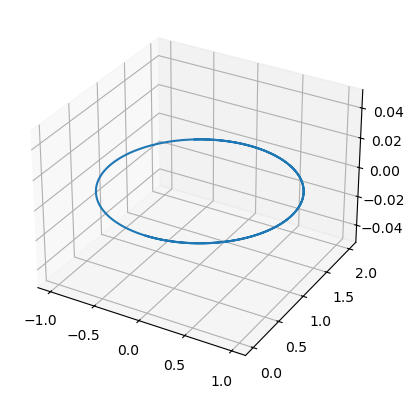

In [4]:
pos = trajectory(n_time_steps=int(1e5), dt=1e-4)

plot_trajectory(pos)

It is well known that a uniform magnetic field perpendicular to the direction of motion leads to cyclotron motion. Our simulation corresponds to a cyclotron without the deflection plates, so circular motion is exactly what we would expect!

To test our simulation experimentally, we would need a strong magnet capable of generating a uniform magnetic field and an electron cannon. We could then fire some electrons into the magnetic field and see if they move in a circle.

# 2

We'll need to make a few modifications to our code if we want to use the solve_ivp function.

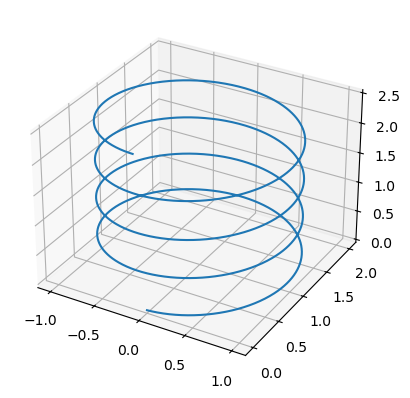

In [9]:
# Initial conditions (changed the initial velocity in the z direction to 0.1)
x_0 = 0
y_0 = 0
z_0 = 0
v_x_0 = 1
v_y_0 = 0
v_z_0 = 0.1

def derivatives_modified(t, vars):
    '''
    Takes in a numpy array of the variables [x, y, z, v_x, v_y, v_z] and returns their derivatives [Dx, Dy, Dz, Dv_x, Dv_y, Dv_z]

    Modified to also take in a time value as required by solve_ivp() (although time does not appear explicitly in the equations of motion)
    '''
    x, y, z, v_x, v_y, v_z = [val for val in vars]

    # These are just the equations of motion
    Dx = (q*B_z / m) * y + v_x_0
    Dy = - (q*B_z / m) * x + v_y_0
    Dz = v_z

    Dv_x = (q*B_z / m) * v_y
    Dv_y = - (q*B_z / m) * v_x
    Dv_z = 0

    return np.array([Dx, Dy, Dz, Dv_x, Dv_y, Dv_z])

# This lets us pass our initial conditions to solve_ivp
variables_t0 = np.array([x_0, y_0, z_0, v_x_0, v_y_0, v_z_0])

# The time interval that solve_ivp considers (i.e. the time interval for which the solution is plotted)
t0 = 0
t_max = 25

# We end the simulation when the particle reaches z = 0.6
def end(t, vars):
    x, y, z, v_x, v_y, v_z = [val for val in vars]
    return z - 0.6 
end.terminal = True # Not exactly sure what this does but it has to be here for solve_ivp to stop when we want it to

# We use solve_ivp to solve the equations of motion instead of doing it by Euler Integration ourselves
sol = solve_ivp(derivatives_modified, (t0, t_max), variables_t0, max_step = 0.01, event=end)

# Get the first three colums of the solution
pos = sol.y[:3]
# We need to transpose this since the pos array currently has a shape of (3, n) and we want (n, 3)
pos = pos.T

plot_trajectory(pos)


In part 1 we found that $\dot{z} = {v_z}_0$, that is, the velocity in the z-direction is constant. This is because of the cross product in the Lorentz Force Law: The magnetic force on the particle lies in the xy-plane and can't change it's velocity in the z-direction.

So by adding an initial velocity in the z-direction, we would expect to get the same circular motion as before, as well as an upwards motion at a constant velocity, i.e. an upwards spiral.

This is exactly what we see in the plot!